<a href="https://colab.research.google.com/github/FaYMan2/Models-from-scratch/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#**Logistic Regression**
#####  logistic regression is the baseline supervised machine learning algorithm for classification.
##### Logistic Regression like so many supervised learning model has two phases - Training phase and test

## **The Sigmoid function**
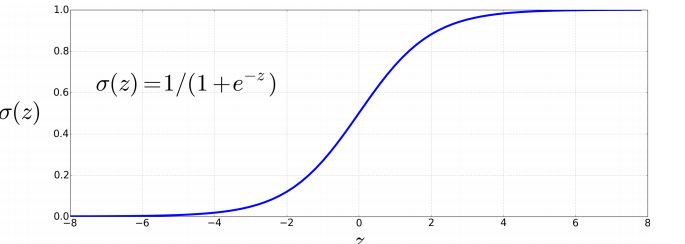


In [ ]:
## This notebook we will be creating a Logistic Regression model and give a breif explaination of each step

class Logistic_Regressor:

  # Creating a constructor/initialisation function to pass parameters such as Number of epochs and Learning rate
  def __init__(self,maxEpochs = 1000,Learning_rate = 0.001,threshold = 0.5):
    self.weights = 0
    self.C = 0
    self.Epochs = maxEpochs
    self.LR = Learning_rate
    self.LOSS = []
    self.threshold = threshold
    self.k = 1


  # Function to get predictions from fitted model
  # Note : Not to be called before fitting with training data (will give wrong outputs)
  def predict(self,X):
      pred = np.dot(X,self.weights) + self.C
      probability = self.sigmoid(pred)
      predictions = [1 if i > self.threshold else 0 for i in probability]
      return predictions

  # The sigmoid function is used to map probability to 0 or 1 (nearly close),
  #  that enables the model to perform binary classification
  # The sigmoid function is represented as s(x) = L / 1 - e ^ -x
  def sigmoid(self,x):
    try:
      return 1 / (1 + np.exp(-(x+self.k)))
    except:
      print(f'Eroor here = {x}')

  # The cross entropy loss function is used to calculate loss at each step
  # the function in our case can be defined as  Loss = -[y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred)]
  def CrossEntropyLoss(self,y_pred,y_true):
    # we have to add very small value dx to the insides of a log function as when lim x -> 0 log(x) is undefined
    dx = 1e9
    k1 = (y_true * np.log(y_pred + dx))
    k2 = (1 - y_true * np.log(1 - y_pred + dx))
    loss = -np.mean(k1 + k2)
    return loss

  # This function is used to get predictions for feeding into the model learning process
  # NOTE : Not to be used outside class ie not be called using class object
  def get_pred(self,X):
    pred = np.dot(X,self.weights) + self.C
    probability = self.sigmoid(pred)
    return probability

  def Fit(self,X,y):
    # Getting the number of samples and number of features from the input data
    sample_count,feature_count = X.shape

    # Setting up / Initialising the parameters before training
    self.weights = np.zeros(feature_count)
    self.C = 0

    for i in range(self.Epochs):
      # getting predictions for comparison
      y_pred = self.get_pred(X)

      # Derivative of weights and Bias term (C)
      # In gradient descent derivative of loss function is calculated and then divided by number of samples
      # for weights derivative = (1/n) * X(y_pred - y_true)
      # for bias term (C) derivative = (1/n) * (y_pred - y_true)
      weight_derivative = (1/sample_count) * np.dot(X.T,(y_pred - y))
      C_derivative = (1/sample_count) * np.sum(y_pred - y)

      loss = self.CrossEntropyLoss(y_pred,y)
      self.LOSS.append(loss)

      # In gradient descent algorithm
      # K_+1 = K - Learning rate * derivative(Loss Function)
      self.weights -= self.LR * weight_derivative
      self.C -= self.LR * C_derivative


In [ ]:
## Getting a Binary classification dataset from Sklearn.datasets
from sklearn import datasets
from sklearn.model_selection import train_test_split
lbc = datasets.load_breast_cancer()
x = lbc.data
y = lbc.target
# We have to perform train-test split for Traning and validation of then dataset
# For better performance its better to split the training and testing datasets randomly rather than sequntially
# its better to import the training-testing split function from sklearn than coding the entire random shuffle by ourself
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 20)
print(x_train.shape,y_train.shape)
model = Logistic_Regressor()
model.Fit(x_train,y_train)
y_pred = model.predict(x_test)
print(y_pred)

(455, 30) (455,)


<ipython-input-2-baa2ea556902>:29: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-(x+self.k)))


[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1]


In [ ]:
# Model we will test the model across accuracy and precision
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        43
           1       0.97      0.90      0.93        71

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



Text(50.722222222222214, 0.5, 'Prediction')

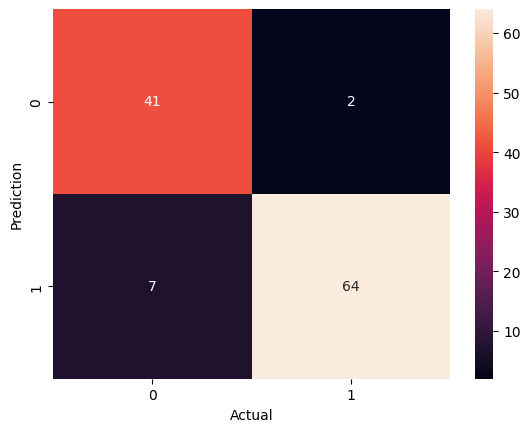

In [ ]:
# Creating confustion matrix
import seaborn as sns
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(
    cm,
    annot = True,
    fmt = 'g',
)

plt.xlabel('Actual')
plt.ylabel('Prediction')